In [1]:
#This is the code to get the image

"""
10,000 images of each shape is made
resulting in 80,000 images to use as
training data and around 10,000 to be
used for testing. These images are clean
and have no noise added to them so the
AI can easily be able to identify the image

"""

# import math 
# from PIL import Image, ImageDraw, ImageColor, ImagePath

# import random
 
    
# def draw_a_shape(number):
    
#     img = Image.new("RGB", (128,128), "white")  
    
#     image = ImageDraw.Draw(img)

#     a = random.randint(0,129)

#     #The center is at (64,64)

#     side = 10
    
#     angle = ((2*math.pi)/side)

#     length = abs(64-a)

#     if a > 64:
    
#         point_1 = (a,64)
    
#     else:
        
#         point_1 = (64+length, 64)
    
#     xy = [point_1]

#     for i in range (side-1):
    
#         x_coor = (length*math.cos((i+1)*angle)) +64
    
#         y_coor = (length*math.sin((i+1)*angle)) +64
        
#         x_coor = round(x_coor,5)
        
#         y_coor = round(y_coor,5)
        
#         point_2 = (x_coor, y_coor)
        
#         xy.append(point_2)
    
#         e = 64 - length

#         f = 64 + length

#     if a > 64:
   
#         distance_x = abs(a-e)
    
#         distance_y = abs(e-f)
    
#     else:
    
#         distance_x = abs(a-f)
    
#         distance_y = abs(e-f)
       
#     image.polygon(xy, fill =None, outline ="black")  
 
#     img.save("a.png")

#     imm = Image.open("a.png")

#     if a > 64:
    
#         im_1 = imm.crop((e,e,a,f)) 

#     else:
        
#         im_1 = imm.crop((a,e,f,f))

#     im_1.save("a.png")

#     imgg = Image.open("a.png")
    
#     angle = random.randint(0,361)
    
#     out = im_1.rotate(angle, fillcolor = "white")

#     out.save("a.png")

#     img_2 = Image.new("RGB", (128,128), "white")  

#     image_2 = ImageDraw.Draw(img_2)

#     coo = random.randint(0,128-distance_x)

#     doo = random.randint(0,128-distance_y)

#     back_im = img_2.copy()

#     back_im.paste(out, (coo,doo))


#     back_im.save("10_sides_"+str(number)+".png")

# #     pix_val = list(back_im.getdata())

# #     print(pix_val)

# def main():
#     i = 0
#     while i < 10001:
#         try:
#             draw_a_shape(i)
#             i +=1
#         except (SystemError, ValueError):
#             i = i
            
# main()

'\n10,000 images of each shape is made\nresulting in 80,000 images to use as\ntraining data and around 10,000 to be\nused for testing. These images are clean\nand have no noise added to them so the\nAI can easily be able to identify the image\n\n'

In [2]:
#This is the code to add Gausian noise 
# import numpy as np
# import cv2
# import random
# import os 

# def blurred(number):
    
#     image_path = r"C:\Users\nguyent2\Desktop\Training\10_sides_"+str(number) + r".png"

#     directory = r'C:\Users\nguyent2\Desktop\Testing'

#     img = cv2.imread(image_path)

#     os.chdir(directory) 

#     filename = 'testing_10_sides_'+str(number)+'.png'

#     mean = 0
    
#     var = random.uniform(10,12)
    
#     sigma = var ** random.uniform(1,1.5)
    
#     gaussian = np.random.normal(mean, sigma, (128, 128)) #  np.zeros((224, 224), np.float32)

#     noisy_image = np.zeros(img.shape, np.float32)


#     if len(img.shape) == 2:
    
#         noisy_image = img + gaussian

#     else:
    
#         noisy_image[:, :, 0] = img[:, :, 0] + gaussian
    
#         noisy_image[:, :, 1] = img[:, :, 1] + gaussian
    
#         noisy_image[:, :, 2] = img[:, :, 2] + gaussian

#     cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)

#     noisy_image = noisy_image.astype(np.uint8)

#     cv2.imwrite(filename, noisy_image) 

# def main():
#     i = 0
#     while i < 100000:
#         try:
#             blurred(i)
#             i += 1
#         except AttributeError:
#             i = i

# main()

In [3]:
#import the libraries needed 

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.optimizers import RMSprop, Adam

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
import os


In [4]:
#Open the files in the Training Set
filenames = os.listdir(r"C:\Users\nguyent2\Desktop\Training")

#Classify the images into the correct categories.

#Initiate an empty list of the categories
categories = []

"""
Since the images are named with
the title based on the number of sides)
The reason I did this:
Classify the images
into the correct categories.
(Because the training set is a single
folder called “Training”, and it
has the total number of
different shapes.
So I created a .csv file
to map the title of the image name
into the correct category.    
"""


#Loop through all of the files in the Training Set
for filename in filenames:
    
    #Get category equals to the first character in the filename
    category = filename[0]
    

    #Set the images into the correct labels
    if category == "3":
        categories.append("triangle")
    elif category == "4":
        categories.append("square")
    elif category == "5":
        categories.append("pentagon")
    elif category == "6":
        categories.append("hexagon")
    elif category == "7":
        categories.append("heptagon")
    elif category == "8":
        categories.append("octagon")
    elif category == "9":
        categories.append("nonagon")
    else:
        categories.append("decagon")

#Creating the .csv file with the filename and category
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

#This line is used to shuffle the dataframe
df = df.sample(frac=1)

In [5]:
#Export the .csv file to check the images with the labels
# df.to_csv(r"C:\Users\nguyent2\Desktop\New.csv")

#Check the head()
df.head()

,filename,category
452,4_sides_146.png,square
571,4_sides_73.png,square
1528,9_sides_34.png,nonagon
797,5_sides_97.png,pentagon
158,10_sides_61.png,decagon


In [6]:
#Check the tail()
df.tail()

,filename,category
1562,9_sides_65.png,nonagon
1091,7_sides_181.png,heptagon
1524,9_sides_30.png,nonagon
1099,7_sides_189.png,heptagon
1143,7_sides_48.png,heptagon


<AxesSubplot:>

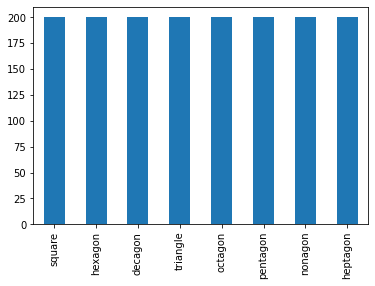

In [7]:
#Plot the number of images in each label in the training set
"""
This is the .csv file
containing all titles of the
images (in the first column)
with the correct labels (in the
second column).
"""
df['category'].value_counts().plot.bar()

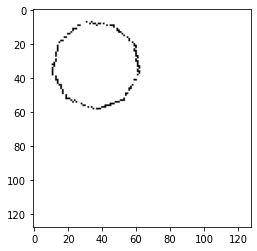

In [8]:
#Randomly pick 1 image
sample = random.choice(filenames)

#Load the image to check the image
image = load_img(r"C:\Users\nguyent2\Desktop\Training\\" + sample)

#Show the image
plt.imshow(image)

In [9]:
#In the training set, splitting the images into 2 smaller sets, which are train_df and validate_df 
#with a ratio of 8:2
#This means 80% of the training set is in train_df, 20% of the training set is in validate_df
"""
Plot the number
of images
in each label (category)
to double check.
There are equal number
of images in each category.
 did this because
I thought I would like
to see if the training
process actually
works on that particular
training set.
I did this because
I wanted to test my model
on the set of train_df and
on the set of validate_df.
The training set, if it is not splitted,
I was afraid that bias would be created
during training.
"""
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)


#Drop the index of the training_df
train_df = train_df.reset_index(drop=True)

#Drop the index of the validate_df

validate_df = validate_df.reset_index(drop=True)




<AxesSubplot:>

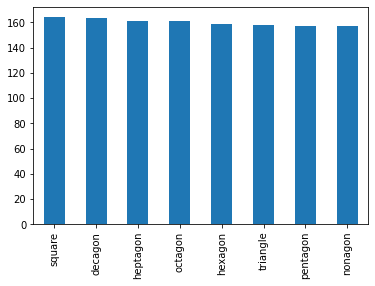

In [10]:
#Plot the number of images in train_df
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

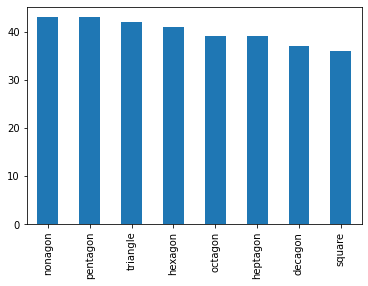

In [11]:
#Plot the number of images in the validate_df
validate_df['category'].value_counts().plot.bar()

In [12]:
#Set batch size, the image_width, and image_height
"""
batch_size is the total number of training
examples present in a single batch.
I can’t pass the entire dataset (in case there
are so many images) into the neural net at once.
So, I devided the dataset into a number of
batches (each batch has the
same batch_size, except the last batch has the
remaining number of image. When there
are fewer images than the batch_size
in a batch, that batch is the last batch.
epochs is the number of complete passes
through the training dataset.
batch_size must be more than
or equal to one and less than or equal to
the number of samples in the training dataset.
Small batch_size gives a learning process
that converges quickly at the cost of noise
in the training process.
Large batch_size gives a learning process
that converges slowly with accurate estimates
of the error gradient.
The batch_size is a hyperparameter of
gradient descent that controls the number
of training samples to work through
before the model’s internal parameters
are updated.
The number of epochs is a hyperparameter
of gradient descent that controls the number of complete passes through the training dataset.
#Plot the number of images in train_df
train_df['category'].value_counts( ).plot.bar( )
#Plot the number of images in the validate_df
validate_df['category'].value_counts( ).plot.bar( )
#Set batch size, the image_width, and image_height
total_train = train_df.shape[0] #This is just the first
image of the train_df
total_validate = validate_df.shape[0] 
#This is justthe first image of the validates_df
In general, batch size of 32 is a good starting point, or batch_size can be equal to 64, 128, and
256.
Other values (lower or higher) may be fine for some data sets, but the given range is generally
the best to start experimenting with. Though, under 32, it might get too slow because of
significantly lower computational speed, because of not exploiting vectorization to the full
extent. Therefore, I chose batch_size = 32.
For the epochs, I just used 50 because I think it is enough.
"""


total_train = train_df.shape[0] #This is just the first image of the train_df
total_validate = validate_df.shape[0] #This is just the first image of the validates_df

batch_size=32
epochs=50
IMAGE_WIDTH = 128

IMAGE_HEIGHT = 128

IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)



In [13]:
#In order to make the most of my few training examples, I will "augment" them via a number of random transformations, 
#so that my model would never see twice the exact same picture. 
#This helps prevent overfitting and helps the model generalize better.


"""
In order to make the most of my few
training examples, I will "augment" them
via a number of random transformations,
so that my model would never see
twice the exact same picture.
This helps prevent overfitting
and helps the model generalize better.

"""
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

#Set up the train_generator in keras

train_generator = train_datagen.flow_from_dataframe(
    train_df, r"C:\Users\nguyent2\Desktop\Training", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size= batch_size
)

Found 1280 validated image filenames belonging to 8 classes.


In [14]:
"""
I did the same thing for the images
in the validation set.
I just rescaled the image.
Then set up the validation_generator
from keras.
"""
#Normalize the images in the validation_datagen
validation_datagen = ImageDataGenerator(rescale=1./255)

#Set up the validation_generator
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    r"C:\Users\nguyent2\Desktop\Training", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)



Found 320 validated image filenames belonging to 8 classes.


In [15]:
#This is just to show 1 example to check if the images in the two sets above 
#(the train_datagen and the validation_datagen) are correctly set up or not.
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,   r"C:\Users\nguyent2\Desktop\Training", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


In [16]:
# plt.figure(figsize=(128, 128))
# for i in range(0, 15):
#     plt.subplot(5, 3, i+1)
#     for X_batch, Y_batch in example_generator:
#         image = X_batch[0]
#         plt.imshow(image)
#         break
# plt.tight_layout()
# plt.show()

In [17]:
#This is the model



"""
Applies the rectified linear
unit activation function.
With default values, this returns
the standard ReLU activation: max(x, 0),
the element-wise maximum of 0 and
the input tensor.
Modifying default parameters allows to
use non-zero thresholds,
change the max value of the activation,
and to use a non-zero multiple
of the input for values below the threshold.
"""

model = Sequential()

model.add(Conv2D(32 , (3,3) , strides = 2 , padding = 'same' , activation = 'relu' , input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT,3)))

model.add(BatchNormalization())

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 2 , padding = 'same' , activation = 'relu'))

model.add(Dropout(0.2))

model.add(BatchNormalization())

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 2 , padding = 'same' , activation = 'relu'))

model.add(BatchNormalization())

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 512 , activation = 'relu'))

model.add(Dropout(0.3))

model.add(Dense(units = 8 , activation = 'softmax'))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()






Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [18]:
# Set a learning rate annealer
"""
Early stopping is a method that allows you
to specify an arbitrary large number of training
epochs and stop training once the model
performance stops improving on a hold out
validation dataset.
"""

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [19]:

history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    verbose = 1,
    callbacks=[earlystop]
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
40/40 [==============================] - 8s 212ms/step - loss: 2.8234 - accuracy: 0.1344 - val_loss: 2.1054 - val_accuracy: 0.1156
Epoch 2/50
40/40 [==============================] - 8s 207ms/step - loss: 2.1528 - accuracy: 0.1437 - val_loss: 2.2610 - val_accuracy: 0.1219
Epoch 3/50
40/40 [==============================] - 8s 202ms/step - loss: 2.0898 - accuracy: 0.1461 - val_loss: 2.4391 - val_accuracy: 0.1219
Epoch 4/50
40/40 [==============================] - 8s 191ms/step - loss: 2.0651 - accuracy: 0.1789 - val_loss: 2.5770 - val_accuracy: 0.1187
Epoch 5/50
40/40 [==============================] - 8s 199ms/step - loss: 2.0582 - accuracy: 0.1883 - val_loss: 2.6078 - val_accuracy: 0.1156
Epoch 6/50
40/40 [==============================] - 8s 200ms/step - loss: 2.0455 - accuracy: 0.1930 - val_loss: 2.7587 - val_accuracy: 0.1156
Epoch 00006: early stopping


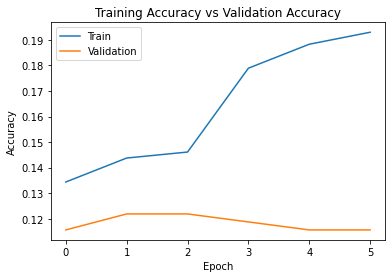

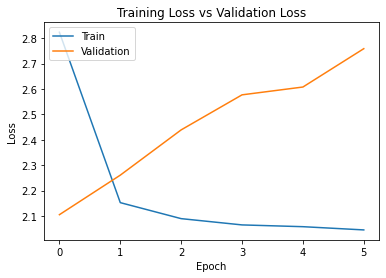

In [20]:
"""
Early stopping is a method that allows you
to specify an arbitrary large number of training
epochs and stop training once the model
performance stops improving on a hold out
validation dataset.

"""
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
"""
This one
is to create a dataframe
for the testing set.
The testing set is different
from the training set.
It just means that we want
to know how much if we are going
to feed the whole new set
of images in the testing set
in the CNN to evaluate.
"""
test_filenames = os.listdir(r"C:\Users\nguyent2\Desktop\Testing")

test_df = pd.DataFrame({
    'filename': test_filenames
})
test_df = test_df.sample(frac=1)

nb_samples = test_df.shape[0]

In [22]:
"""
This is to create
a test_generator
"""
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    r"C:\Users\nguyent2\Desktop\Testing", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 40 validated image filenames.


In [23]:
#This is to predict the model
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

Instructions for updating:
Please use Model.predict, which supports generators.


In [24]:
test_df['category'] = np.argmax(predict, axis=-1)

In [25]:
#Get the label mapped with the titles of the images (in the testing set).
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
# test_df.to_csv(r"C:\Users\nguyent2\Desktop\New_2.csv")

<AxesSubplot:>

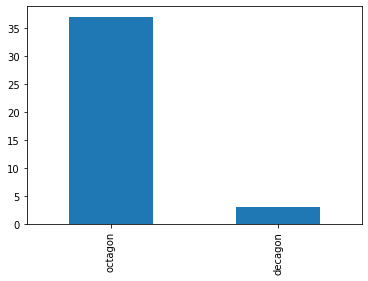

In [26]:
"""
Plot to see
if the numbers of images
in each category is correct
enough (since we
know the number of images in each
category in the testing set).
"""


test_df['category'].value_counts().plot.bar()

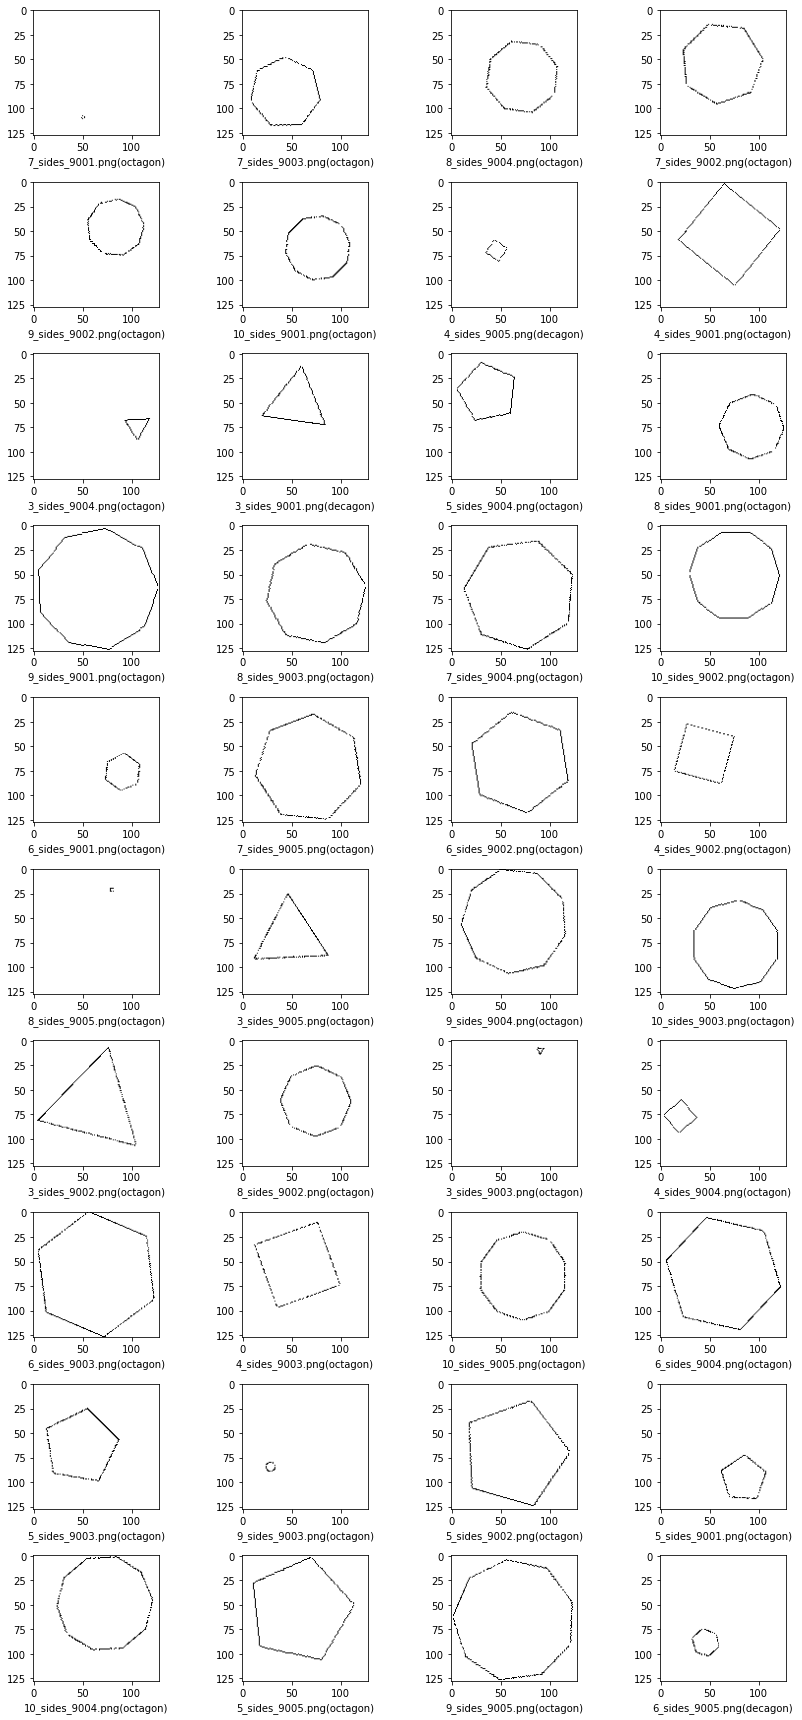

In [27]:
"""
This is to see the result of
the random 40 images
from the testing set
with the category.
"""
sample_test = test_df.head(40)
sample_test.head()
plt.figure(figsize=(12, 24))
i = 0
for index, row in sample_test.iterrows():
    i +=1
    filename = row['filename']
    category = row['category']
    img = load_img(r"C:\Users\nguyent2\Desktop\Testing\\"+filename, target_size=IMAGE_SIZE)
    plt.subplot(10, 4, i)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()